# Classification Algorithms

## 1. K-Nearest Neighbour

Importing the required Python Packages

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

Lets download the dataset. To download the data, we will use !wget to download it from IBM Object Storage.

In [3]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2019-08-13 18:32:34--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  36.18K   119KB/s    in 0.3s    

2019-08-13 18:32:35 (119 KB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



**Creating a dataframe from the csv file**

In [4]:
df = pd.read_csv('teleCust1000t.csv')
df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


<b> About the dataset </b>

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns. 

The target field, called __custcat__, has four possible values that correspond to the four customer groups, as follows:
  1- Basic Service
  2- E-Service
  3- Plus Service
  4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


In [5]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Searching the presence of NaN values in every column

In [6]:
for col in df.columns:
    print('The no. of NaN values in column {} is : {}'.format(col,df[col].isnull().sum()))

The no. of NaN values in column region is : 0
The no. of NaN values in column tenure is : 0
The no. of NaN values in column age is : 0
The no. of NaN values in column marital is : 0
The no. of NaN values in column address is : 0
The no. of NaN values in column income is : 0
The no. of NaN values in column ed is : 0
The no. of NaN values in column employ is : 0
The no. of NaN values in column retire is : 0
The no. of NaN values in column gender is : 0
The no. of NaN values in column reside is : 0
The no. of NaN values in column custcat is : 0


<b> Lets see how many of each class is present in the cutsat column </b>

In [7]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

<b> So we have :
    * 266 Basic Service,
    * 217 E-Service,
    * 281 Plus Service,
    * 236 Total Service,
</b>

### Feature Set

In [8]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [9]:
# To use scikit-learn library we need to convert dataframe to a numpy array

x = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values

x[0:10]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.],
       [  2.,  41.,  39.,   0.,  17.,  78.,   2.,  16.,   0.,   1.,   1.],
       [  3.,  45.,  22.,   1.,   2.,  19.,   2.,   4.,   0.,   1.,   5.],
       [  2.,  38.,  35.,   0.,   5.,  76.,   2.,  10.,   0.,   0.,   3.],
       [  3.,  45.,  59.,   1.,   7., 166.,   4.,  31.,   0.,   0.,   5.],
       [  1.,  68.,  41.,   1.,  21.,  72.,   1.,  22.,   0.,   0.,   3.]])

In [10]:
y = df['custcat'].values
y[0:10]

array([1, 4, 3, 1, 3, 3, 2, 4, 3, 2])

### Normalizing data

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [11]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Train Test Split

To get higher Out of Sample Accuracy , we use the method of Train Test Split where the accuracy is determined by how accurately the model predicts the output on data on which it is not trained on.

In [12]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state = 4)

print('X_train : {} \n X_test : {} \n Y_train : {}, \n Y_test : {}'.format(x_train.shape,x_test.shape,y_train.shape,y_test.shape))

X_train : (800, 11) 
 X_test : (200, 11) 
 Y_train : (800,), 
 Y_test : (200,)


In [13]:
# Importing the KNN Library

from sklearn.neighbors import KNeighborsClassifier

<b> Training Data </b>

In [14]:
k = 6
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

<b> Predicting </b>

In [15]:
yhat = neigh.predict(x_test)
yhat

array([3, 3, 3, 4, 4, 3, 3, 4, 2, 4, 1, 4, 3, 1, 3, 1, 4, 4, 3, 2, 3, 2,
       1, 1, 1, 3, 2, 1, 1, 2, 3, 1, 4, 2, 1, 2, 3, 1, 2, 2, 3, 2, 1, 1,
       4, 1, 2, 1, 4, 4, 2, 1, 2, 2, 2, 3, 3, 3, 1, 4, 1, 4, 2, 1, 3, 3,
       1, 3, 2, 1, 1, 3, 4, 3, 2, 1, 1, 1, 2, 3, 3, 4, 2, 4, 2, 1, 3, 3,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 2, 4, 1, 1, 1, 4, 2, 4, 2, 2,
       1, 3, 2, 4, 1, 2, 1, 3, 2, 3, 4, 1, 2, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 4, 2, 2, 4, 1, 1, 2, 4, 3, 4, 1, 1, 2, 1, 1, 2, 2, 1, 2, 4, 2,
       2, 3, 3, 3, 3, 1, 2, 1, 2, 1, 1, 4, 1, 1, 3, 1, 3, 3, 3, 2, 2, 2,
       1, 4, 1, 1, 1, 2, 1, 3, 3, 1, 1, 1, 4, 1, 3, 1, 3, 3, 3, 4, 1, 3,
       1, 3])

In [16]:
y_test

array([4, 1, 1, 2, 4, 4, 3, 1, 3, 4, 4, 2, 4, 1, 4, 3, 4, 2, 3, 4, 1, 1,
       1, 3, 4, 4, 4, 2, 4, 3, 1, 1, 4, 3, 4, 4, 3, 3, 4, 4, 2, 4, 1, 1,
       2, 4, 3, 3, 2, 2, 2, 3, 2, 3, 3, 4, 4, 3, 1, 4, 1, 2, 3, 3, 3, 1,
       4, 3, 2, 4, 3, 1, 4, 3, 1, 4, 2, 4, 3, 2, 1, 3, 1, 1, 1, 2, 3, 2,
       1, 3, 4, 1, 3, 1, 3, 1, 4, 1, 1, 3, 4, 1, 4, 3, 4, 4, 2, 1, 3, 4,
       4, 1, 2, 2, 1, 2, 3, 1, 3, 1, 1, 1, 2, 3, 3, 4, 2, 4, 2, 1, 2, 1,
       3, 1, 3, 3, 2, 2, 1, 3, 2, 2, 2, 3, 1, 4, 3, 2, 2, 3, 4, 4, 4, 2,
       2, 3, 1, 2, 4, 3, 3, 1, 1, 3, 1, 4, 4, 1, 3, 2, 1, 2, 4, 2, 4, 2,
       2, 3, 4, 1, 1, 2, 3, 1, 4, 1, 4, 1, 3, 4, 2, 3, 1, 2, 3, 2, 3, 3,
       2, 3])

<b> Accuracy Evaluation </b>

In [17]:
from sklearn import metrics

print('The train data Accuracy :',metrics.accuracy_score(y_train,neigh.predict(x_train)))
print('The test data Accuracy :',metrics.accuracy_score(y_test,yhat))

The train data Accuracy : 0.51625
The test data Accuracy : 0.31


#### What about other K?
K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different Ks.

In [18]:
Ks = 500
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ,
       0.33 , 0.315, 0.34 , 0.33 , 0.315, 0.34 , 0.36 , 0.355, 0.35 ,
       0.345, 0.335, 0.35 , 0.36 , 0.37 , 0.365, 0.365, 0.365, 0.35 ,
       0.36 , 0.38 , 0.385, 0.395, 0.395, 0.38 , 0.37 , 0.365, 0.385,
       0.395, 0.41 , 0.395, 0.395, 0.395, 0.38 , 0.39 , 0.375, 0.365,
       0.38 , 0.375, 0.375, 0.365, 0.36 , 0.36 , 0.365, 0.37 , 0.38 ,
       0.37 , 0.37 , 0.37 , 0.36 , 0.35 , 0.36 , 0.355, 0.36 , 0.36 ,
       0.36 , 0.34 , 0.34 , 0.345, 0.35 , 0.35 , 0.355, 0.365, 0.355,
       0.355, 0.365, 0.37 , 0.37 , 0.37 , 0.35 , 0.35 , 0.35 , 0.35 ,
       0.36 , 0.355, 0.33 , 0.32 , 0.345, 0.345, 0.345, 0.335, 0.345,
       0.355, 0.345, 0.345, 0.34 , 0.34 , 0.335, 0.345, 0.325, 0.315,
       0.31 , 0.325, 0.32 , 0.32 , 0.325, 0.335, 0.34 , 0.34 , 0.335,
       0.325, 0.34 , 0.33 , 0.325, 0.335, 0.325, 0.325, 0.335, 0.345,
       0.335, 0.34 , 0.345, 0.34 , 0.345, 0.35 , 0.35 , 0.345, 0.345,
       0.345, 0.35 ,

#### Plot  model accuracy  for Different number of Neighbors 

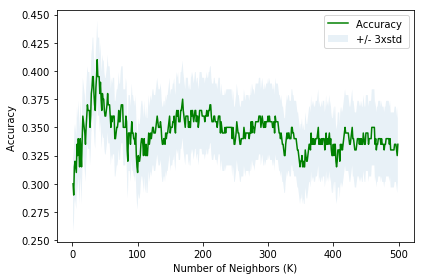

In [19]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [20]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.41 with k= 38


<hr>

## 2. Decision Trees

In [21]:
# Importing the required libraries

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

<div id="about_dataset">
    <h2>About the dataset</h2>
    Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    <br>
    <br>
    Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.
    <br>
    <br>
    It is a sample of binary classifier, and you can use the training part of the dataset 
    to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.
</div>


<b> Downloading the dataset </b>

In [22]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2019-08-13 18:33:31--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2019-08-13 18:33:33 (266 MB/s) - ‘drug200.csv’ saved [6027/6027]



<b> Reading the dataset </b>

In [23]:
df = pd.read_csv('drug200.csv')

df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [24]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [25]:
# Checking for the presence of NaN values

for col in df.columns :
    print('The no. of NaN values in the column {} is : {}'.format(col,df[col].isnull().sum()))

The no. of NaN values in the column Age is : 0
The no. of NaN values in the column Sex is : 0
The no. of NaN values in the column BP is : 0
The no. of NaN values in the column Cholesterol is : 0
The no. of NaN values in the column Na_to_K is : 0
The no. of NaN values in the column Drug is : 0


<b> Pre Processing </b>

In [35]:
x = df[['Age','Sex','BP','Cholesterol','Na_to_K']].values

# Dealing with Categorical Values

from sklearn import preprocessing

# For the Sex Column

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
x[:,1] = le_sex.transform(x[:,1])

# For the BP column

le_bp = preprocessing.LabelEncoder()
le_bp.fit(['HIGH','LOW','NORMAL'])
x[:,2] = le_bp.transform(x[:,2])

# For the Cholestorol Column

le_ch = preprocessing.LabelEncoder()
le_ch.fit(['HIGH','LOW','NORMAL'])
x[:,3] = le_ch.transform(x[:,3])

y = df['Drug']

<b> Setting up the Train and test Split </b>

In [44]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state = 4)

y_train

26     drugY
134    drugY
180    drugY
158    drugC
189    drugY
89     drugY
48     drugY
116    drugX
12     drugY
69     drugY
110    drugA
154    drugY
16     drugX
19     drugY
2      drugC
143    drugY
185    drugY
29     drugY
155    drugC
24     drugY
77     drugY
127    drugX
5      drugX
118    drugA
113    drugX
25     drugY
163    drugY
37     drugX
91     drugY
28     drugY
       ...  
30     drugX
117    drugX
56     drugB
166    drugY
149    drugC
21     drugY
0      drugY
131    drugY
52     drugY
126    drugY
38     drugX
44     drugX
178    drugY
164    drugY
195    drugC
57     drugY
197    drugX
55     drugC
94     drugY
109    drugY
103    drugX
58     drugX
137    drugA
50     drugY
87     drugY
104    drugY
129    drugX
183    drugY
174    drugA
122    drugY
Name: Drug, Length: 160, dtype: object

<b> Modelling </b>

In [45]:
model = DecisionTreeClassifier(criterion = "entropy",max_depth = 4)
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<b> Prediction </b>

In [46]:
pred_test = model.predict(x_test)
pred_test

pred_train = model.predict(x_train)
pred_train


array(['drugY', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugY', 'drugA', 'drugY', 'drugX', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY',
       'drugX', 'drugX', 'drugA', 'drugX', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugB', 'drugX', 'drugC', 'drugA',
       'drugA', 'drugB', 'drugY', 'drugA', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugX', 'drugY', 'drugY', 'drugY',
       'drugA', 'drugY', 'drugB', 'drugY', 'drugX', 'drugY', 'drugA',
       'drugX', 'drugC', 'drugC', 'drugA', 'drugY', 'drugY', 'drugX',
       'drugX', 'drugY', 'drugY', 'drugX', 'drugA', 'drugX', 'drugB',
       'drugA', 'drugX', 'drugY', 'drugX', 'drugX', 'drugC', 'drugB',
       'drugY', 'drugX', 'drugY', 'drugY', 'drugB', 'drugX', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugA', 'drugY', 'drugB',
       'drugX', 'drugX', 'drugA', 'drugX', 'drugY', 'drugB', 'drugY',
       'drugX', 'dru

<b> Evaluation </b>

In [48]:
from sklearn import metrics

print('The total Accuracy on the Train case is: ',metrics.accuracy_score(y_train,pred_train))
print('The total Accuracy on the test case is: ',metrics.accuracy_score(y_test,pred_test))

The total Accuracy on the Train case is:  1.0
The total Accuracy on the test case is:  0.95


<b> Visualization </b>

In [52]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

In [55]:
dot_data = StringIO()
filename = 'drugtree.png'

featuresNames = df.columns[0:5]
targetNames = df['Drug'].unique().tolist()

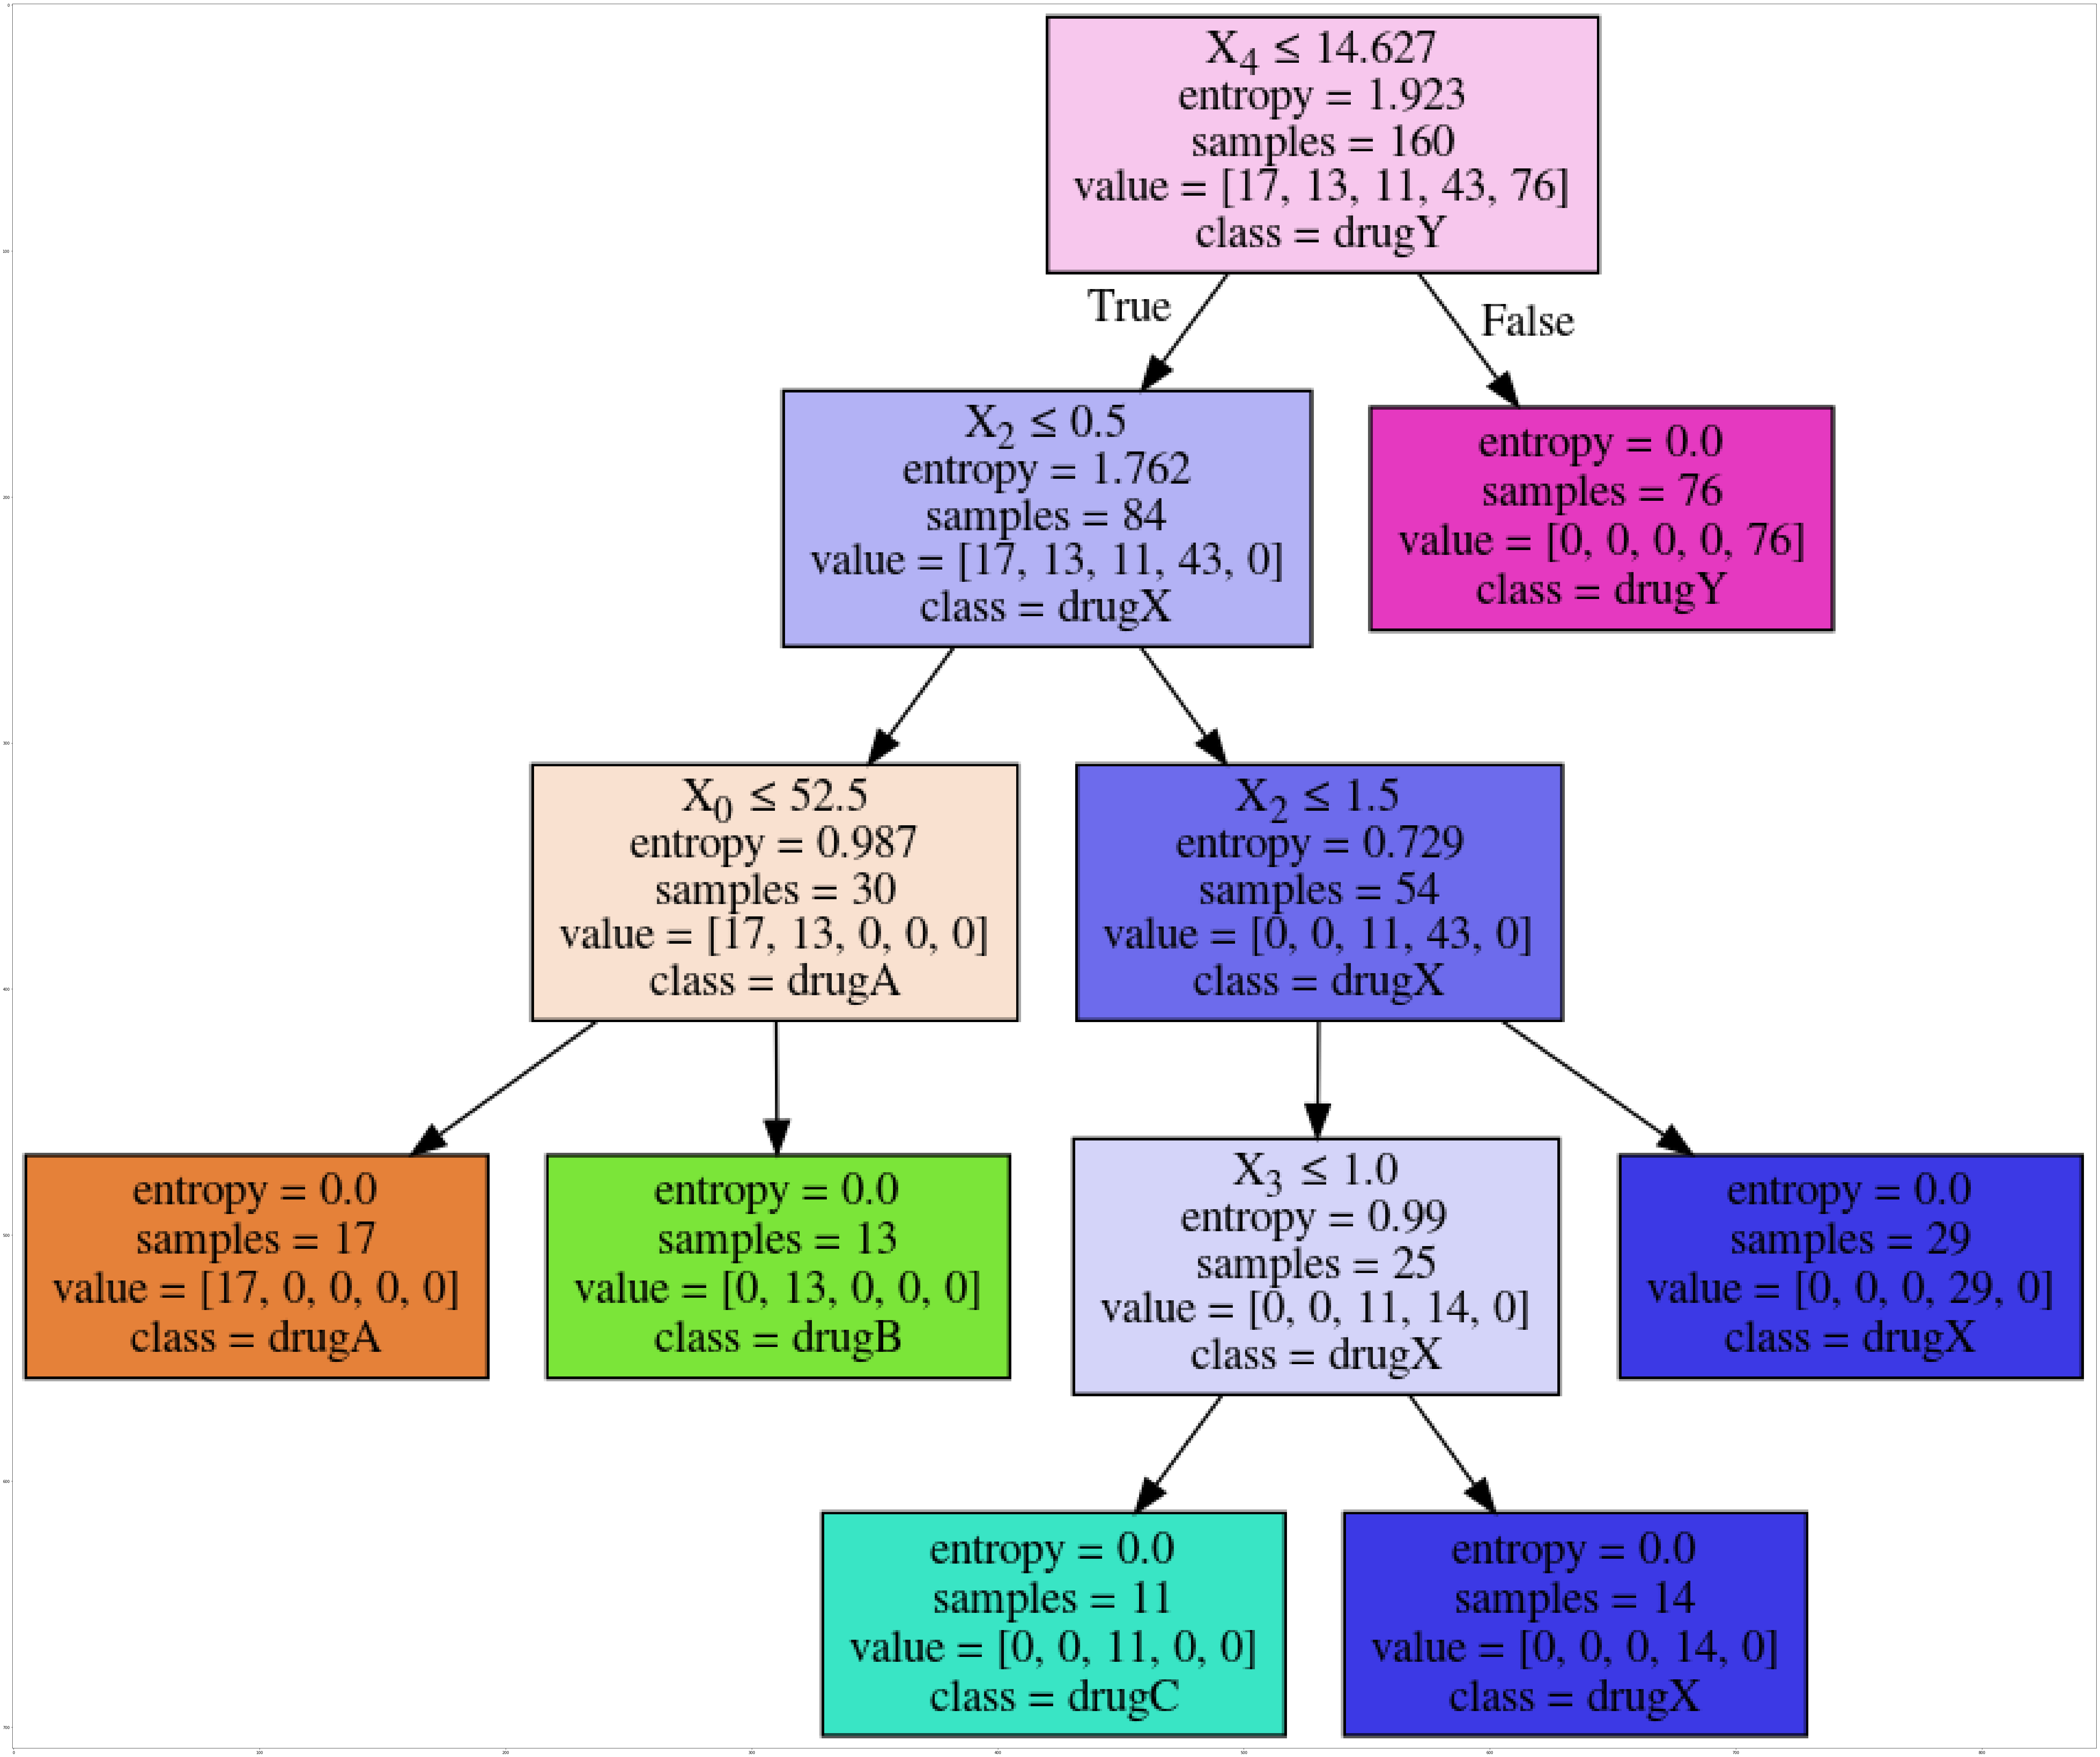

In [57]:
out = tree.export_graphviz(
    model,
    #features_names = featuresNames,
    out_file = dot_data,
    class_names = np.unique(y_train),
    filled = True,
    special_characters = True,
    rotate = False
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)

img = mpimg.imread(filename)
plt.figure(figsize = (100,200))
plt.imshow(img,interpolation = 'nearest')

<hr>

# 3. Logistic Regression

In [ ]:
# Importing the required Libraries

import pandas as pd
import numpy as np
import pylab as pl